In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
from read_wiki import read_top_25_articles
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [146]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [147]:
TOP_25_FILE : str = 'top_25.csv'

In [148]:
articles_df : pd.DataFrame = pd.read_csv(TOP_25_FILE)

In [149]:
# Make matrix of articles and words used for all articles
count_vectorizer = CountVectorizer(stop_words='english')
article_terms_matrix = count_vectorizer.fit_transform(articles_df['text'])
article_terms_matrix = article_terms_matrix.toarray()

In [150]:
# Make matrix of term frequency and inverse document frequency
tf_idf_vectorizer = TfidfVectorizer(stop_words='english')
tf_idf_matrix = tf_idf_vectorizer.fit_transform(articles_df['text'])
tf_idf_matrix = tf_idf_matrix.toarray()

In [151]:
# Word Frequencies

In [152]:
# each article
for i in range(25):
    word_freq = article_terms_matrix[i]
    word_freq_df = pd.DataFrame({'word': count_vectorizer.get_feature_names_out(), 'frequency': word_freq})
    word_freq_df.sort_values(by=['frequency', 'word'], ascending=False, inplace=True)
    print(f'Word Frequencies of Article: {articles_df.loc[i, 'name']}')
    print(word_freq_df.head(10))

Word Frequencies of Article: Kendrick Lamar
            word  frequency
17070      lamar        644
24213  retrieved        486
16519   kendrick        484
21046   original        373
4325    archived        359
1540        2023        355
1523        2022        194
20757    october        190
1465        2018        165
1453        2017        161
Word Frequencies of Article: Belle Gibson
            word  frequency
13144     gibson        148
1423        2015         92
6731      cancer         63
5340       belle         63
24213  retrieved         58
21046   original         52
4325    archived         52
4275       april         52
18432      march         43
7608      claims         37
Word Frequencies of Article: Elon Musk
            word  frequency
19874       musk        678
24213  retrieved        459
10958       elon        412
4325    archived        411
21046   original        409
1523        2022        286
1558        2024        244
1540        2023        170
1495   

In [153]:
# all articles combined
word_freq = np.sum(article_terms_matrix, axis=0)
word_freq_df = pd.DataFrame({'word': count_vectorizer.get_feature_names_out(), 'frequency': word_freq})
word_freq_df.sort_values(by=['frequency', 'word'], ascending=False, inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'lamar'),
  Text(1, 0, 'retrieved'),
  Text(2, 0, 'kendrick'),
  Text(3, 0, 'original'),
  Text(4, 0, 'archived'),
  Text(5, 0, '2023'),
  Text(6, 0, '2022'),
  Text(7, 0, 'october'),
  Text(8, 0, '2018'),
  Text(9, 0, '2015')])

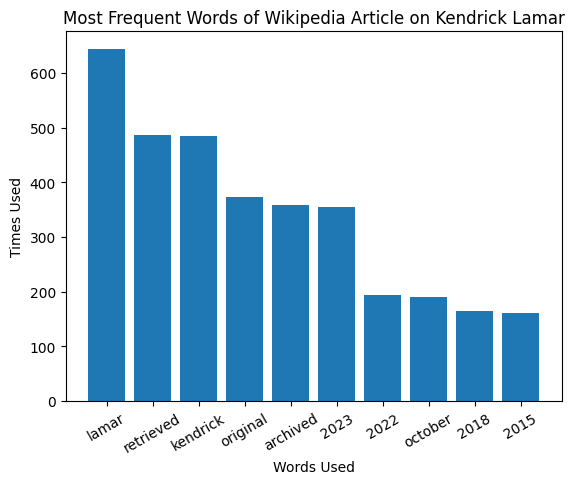

In [154]:
# Plotting Word Frequency for #1 Article
first_article_word_freq = document_terms_matrix[0]
first_article_df = pd.DataFrame({'word': count_vectorizer.get_feature_names_out(), 'frequency': first_article_word_freq}).sort_values('frequency', ascending=False)
plt.bar(first_article_df['word'].head(10), first_article_df['frequency'].head(10))
plt.title(f'Most Frequent Words of Wikipedia Article on {articles_df.loc[0, 'name']}')
plt.xlabel('Words Used')
plt.ylabel('Times Used')
plt.xticks(rotation=30)

In [155]:
# Articles' Similarities

In [156]:
article_similarities = cosine_similarity(tf_idf_matrix)
for i in range(25):
    most_similar = np.argsort(article_similarities[i])[-2] # the last one is 1, which is similarity with self
    print(f'Article most similar to {articles_df.loc[i, 'name']} is {articles_df.loc[most_similar, 'name']} with score of: {article_similarities[i][most_similar]}')
    average_similarity = np.mean(np.sort(article_similarities[i])[:len(article_similarities)])
    print(f'The average similarity score is: {average_similarity}')

Article most similar to Kendrick Lamar is Not Like Us with score of: 0.6715531346799115
The average similarity score is: 0.24759894500791174
Article most similar to Belle Gibson is Kendrick Lamar with score of: 0.14322658608096606
The average similarity score is: 0.11600354860276388
Article most similar to Elon Musk is Kendrick Lamar with score of: 0.2156464943262095
The average similarity score is: 0.1626085616437348
Article most similar to Jalen Hurts is Philadelphia Eagles with score of: 0.5255984284316114
The average similarity score is: 0.22929075024309079
Article most similar to Captain America: Brave New World is Not Like Us with score of: 0.2484647112783439
The average similarity score is: 0.17904318981446413
Article most similar to List of Super Bowl halftime shows is Super Bowl with score of: 0.5002368779381632
The average similarity score is: 0.23653653912569944
Article most similar to List of Super Bowl champions is Super Bowl with score of: 0.8336413963838512
The average s

Text(0.5, 1.0, 'Article Similarity Heatmap')

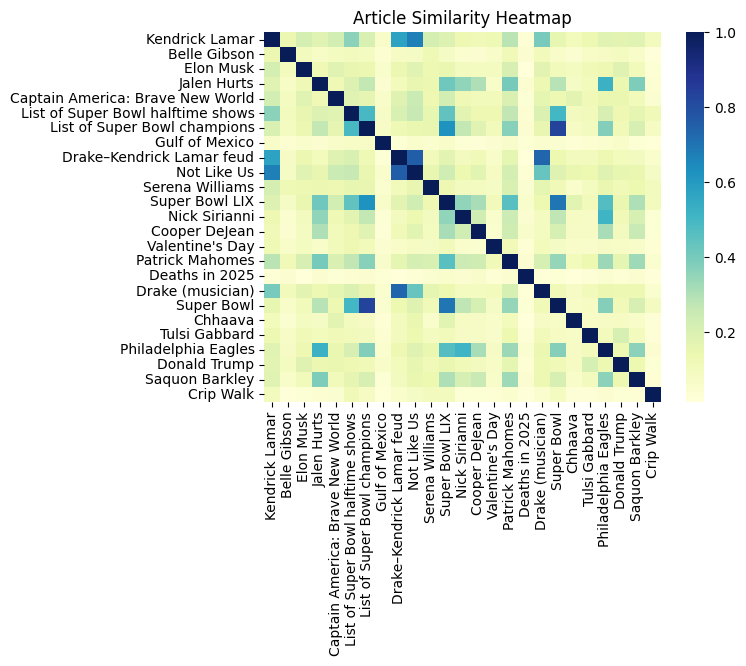

In [157]:
# Creating a heatmap of article similarity
article_names = articles_df['name']
sns.heatmap(article_similarities, cmap="YlGnBu", xticklabels=article_names, yticklabels=article_names)
plt.title("Article Similarity Heatmap")

In [158]:
# Topics

In [160]:
nmf_model = NMF(n_components=2, random_state=100)
topic_matrix = nmf_model.fit_transform(tf_idf_matrix)
# Get top words for each topic
feature_names = tf_idf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-100 - 1:-1]]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: bowl, super, retrieved, eagles, february, nfl, january, game, yards, football, archived, original, season, 2025, hurts, 2024, chiefs, mahomes, new, barkley, sirianni, 2023, team, philadelphia, 2021, 2022, 2020, dejean, coach, rushing, 2018, stadium, championship, jalen, nfc, december, september, sports, pro, 2019, touchdowns, nflcom, quarterback, 10, win, 11, 2017, october, touchdown, 14, kansas, league, bowls, saquon, games, city, 12, lix, afc, nick, giants, yard, 2016, halftime, player, week, 21, november, 13, year, dallas, passing, reference, record, head, playoffs, orleans, iowa, patriots, ufa, york, august, patrick, playoff, futures, 22, 30, offensive, cowboys, june, 15, trump, march, teams, qb, 2015, career, won, 17, packers
Topic 1: drake, lamar, 2024, kendrick, retrieved, original, archived, billboard, july, february, like, 2022, 2023, 2025, song, songwriters, april, musk, hop, album, trump, music, march, october, diss, hip, 2015, november, december, june, rap, 2018, a

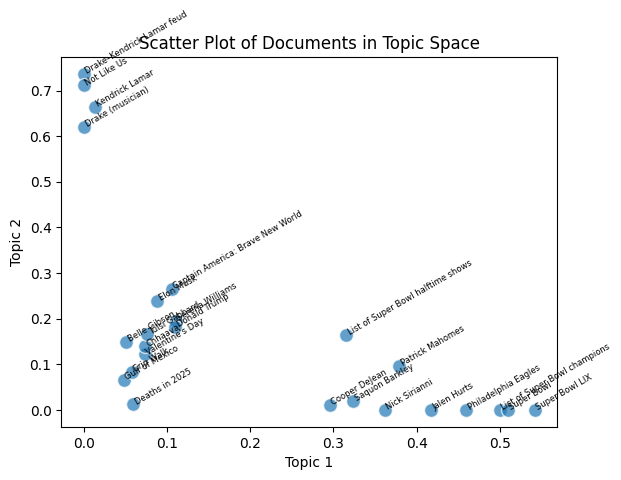

In [174]:
# Scatter plot of Topics
topic_1 = topic_matrix[:, 0]
topic_2 = topic_matrix[:, 1]
plt.scatter(topic_1, topic_2, alpha=0.7, edgecolors='w', s=100)
plt.title("Scatter Plot of Documents in Topic Space")
plt.xlabel("Topic 1")
plt.ylabel("Topic 2")
for i, label in enumerate(articles_df['name']):  # Replace with your document titles
    plt.text(topic_1[i], topic_2[i], label, fontsize=6, alpha=1, rotation=30)

In [175]:
# Sentiment Analysis

In [178]:
articles_df['sentiment'] = articles_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

(0.03606526429341961, 0.21047649490629772)

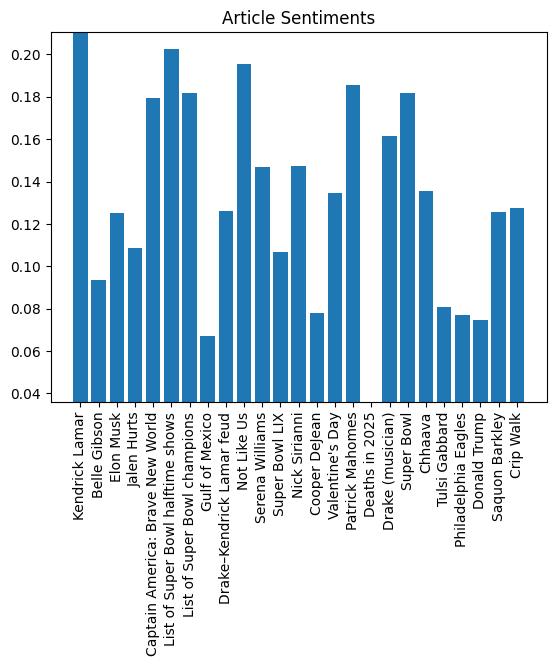

In [193]:
plt.bar(articles_df['name'], articles_df['sentiment'])
plt.title("Article Sentiments")
plt.xticks(rotation=90)
plt.ylim(bottom=np.min(articles_df['sentiment']), top=np.max(articles_df['sentiment']))
# 1 = highly positive, -1 = highly negative